In [1]:
from pathlib import Path
model_ckpt = Path("/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt") \

#model_ckpt /= "PlaceCubeInBowlXArm-v5/sac/10-nobbox-eepctl-tz8s4u1p-g90/models/model_1800000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-eepctl-tongzhou-g90-nohigh-ent0-rs01/models/model_200000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/0-hcam-rlay-cjit-cfgv2-ent0/models/model_200000.ckpt"
model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_100000.ckpt"

seed = int(str(model_ckpt).split('/')[-3].split('-')[0])
env_name = str(model_ckpt).split('/')[-5]

env_name, seed, model_ckpt

('PlaceCubeInBowlXArm-v7',
 10,
 PosixPath('/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_100000.ckpt'))

In [2]:
# cmdline args
args = [
    '/rl_benchmark/pyrl/configs/mfrl/drq/maniskill2/maniskill2_rgbd.py',
    '--eval',
    f"--seed={seed}", "--deterministic", "--gpu-ids", '1',
    "--init-only",  # Only init agent and return
    f"--resume-from={model_ckpt}",

    '--cfg-options',
    f"env_cfg.env_name={env_name}",
    "env_cfg.obs_mode=rgb",
    #"env_cfg.remove_obs_extra=cube_bbox,bowl_bbox",
    "env_cfg.control_mode=pd_ee_delta_pos",
    "env_cfg.horizon=50",
    "env_cfg.image_obs_mode=hand_front",
    
    "rollout_cfg.num_procs=1",
    "agent_cfg.actor_cfg.head_cfg.log_std_clip_tanh=True",
    "agent_cfg.actor_cfg.head_cfg.log_std_bound=-5,2",
    "agent_cfg.gamma=0.9",

    # Turn off wandb logger
    "train_cfg.exp_logger_cfg.type=tensorboard", "train_cfg.exp_logger_cfg._delete_=True",
]

import open3d as o3d
from pyrl.apis.run_rl import main
args, cfg, agent, rollout, evaluator, replay = main(args)

agent = agent.eval()
print("Done")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
torchsparse is not installed correctly!
No module named 'torchsparse'
Pointnet++ is not compiled
cannot import name 'ball_query_ext' from partially initialized module 'pyrl.utils.cpp_ops.ops_3d.ball_query' (most likely due to a circular import) (/usr/local/lib/python3.10/dist-packages/pyrl/utils/cpp_ops/ops_3d/ball_query/__init__.py)
Piontnet++ is not supported
cannot import name 'PointFPModule' from 'pyrl.networks.modules' (/usr/local/lib/python3.10/dist-packages/pyrl/networks/modules/__init__.py)
SparseConv is not supported
No module named 'torchsparse'


pyrl - (run_rl.py:214) - INFO - 2023-06-29,20:09:32 - Get 1 checkpoint ['/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_100000.ckpt'].
pyrl - (run_rl.py:215) - INFO - 2023-06-29,20:09:32 - Check checkpoint ['/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_100000.ckpt']!
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:433) - INFO - 2023-06-29,20:09:33 - Extra arguments that replace the default setting from the config file.
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:435) - INFO - 2023-06-29,20:09:33 - env_cfg.env_name PlaceCubeInBowlXArm-v7
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:435) - INFO - 2023-06-29,20:09:33 - env_cfg.obs_mode rgb
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:435) - INFO - 2023-06-29,20:09:33 - env_cfg.control_mode pd_ee_delta_pos
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:435)

**Environment type** mani_skill2


Evaluation-PlaceCubeInBowlXArm-v7-eval - (evaluation.py:108) - INFO - 2023-06-29,20:09:41 - Evaluation environments have seed in [91571465, 91571466)!
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:491) - INFO - 2023-06-29,20:09:41 - Get obs shape!
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:503) - INFO - 2023-06-29,20:09:41 - State shape:{'rgb': [6, 128, 128], 'state': 32}, action shape:4
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:504) - INFO - 2023-06-29,20:09:41 - Environment has the continuous action space with dimension 4.
PlaceCubeInBowlXArm-v7-eval - (run_rl.py:516) - INFO - 2023-06-29,20:09:41 - Final agent config:
{'type': 'DrQ', 'batch_size': 256, 'gamma': 0.9, 'update_coeff': 0.005, 'alpha': 0.2, 'target_update_interval': 1, 'automatic_alpha_tuning': True, 'shared_backbone': True, 'detach_actor_feature': True, 'alpha_optim_cfg': {'type': 'Adam', 'lr': 0.0003}, 'actor_cfg': {'type': 'ContinuousActor', 'head_cfg': {'type': 'TanhGaussianHead', 'log_std_bound': [-5, 2], 'log_std_clip_tanh'

Done


In [4]:
# Simulated env
USE_REAL_BG = True

from PIL import Image
import numpy as np
import cv2
from pathlib import Path

save_dir = Path("./real_images")
front_img = np.asarray(Image.open(save_dir / "front.png"))
front_img = cv2.resize(front_img, (128,128), cv2.INTER_NEAREST_EXACT)

hand_img = np.ones((128,128,3), dtype=np.uint8) * 255

def update_obs_with_real_env(obs, front_img, hand_img):
    def process_seg_mask(seg_mask, seg_ids):
        mask = np.zeros_like(seg_mask, dtype=bool)
        for seg_id in seg_ids:
            mask[seg_mask == seg_id] = True
        return mask

    rgb = obs["image"]["render_camera"]["rgb"]
    seg_mask = process_seg_mask(obs["image"]["render_camera"]["Segmentation"][..., 1],
                                env_sim.robot_link_ids + [env_sim.bowl.id, env_sim.cube.id])

    rgba = Image.fromarray(np.dstack([rgb, seg_mask.astype(np.uint8) * 255]))
    obs["image"]["render_camera"]["rgb"] = np.asarray(Image.alpha_composite(Image.fromarray(front_img).convert("RGBA"),
                                                                            rgba).convert("RGB")).copy()

    rgb = obs["image"]["hand_camera"]["rgb"]
    seg_mask = process_seg_mask(obs["image"]["hand_camera"]["Segmentation"][..., 1],
                                env_sim.robot_link_ids + [env_sim.bowl.id, env_sim.cube.id])

    rgba = Image.fromarray(np.dstack([rgb, seg_mask.astype(np.uint8) * 255]))
    obs["image"]["hand_camera"]["rgb"] = np.asarray(Image.alpha_composite(Image.fromarray(hand_img).convert("RGBA"),
                                                                          rgba).convert("RGB")).copy()
    obs["agent"]["qvel"] = np.zeros_like(obs["agent"]["qvel"])
    return obs

import mani_skill2.envs
import gym
import numpy as np
import torch
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

from real_robot.utils.visualizer import Visualizer
from mani_skill2.utils.camera import resize_obs_images

env_sim = gym.make("PlaceCubeInBowlXArm-v7", control_mode="pd_ee_delta_pos",
                   obs_mode="rgb", image_obs_mode="hand_front", camera_cfgs={"add_segmentation": True})
env_sim._max_episode_steps = 200

obs = env_sim.reset(seed=0)
obs["image"] = env_sim.get_images_sideview()
obs["image"]["hand_camera"] = env_sim.get_images()["hand_camera"]
obs = resize_obs_images(obs, env_sim.image_obs_shape)
obs["image"]["render_camera"]["rgb"] = (obs["image"]["render_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
obs["image"]["hand_camera"]["rgb"] = (obs["image"]["hand_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
if USE_REAL_BG:
    obs = update_obs_with_real_env(obs, front_img, hand_img)

env_sim.render("human")
env_sim.unwrapped._viewer.toggle_pause(True)

visualizer = Visualizer()
visualizer.update_object(
    *[cap["rgb"] for cap in obs["image"].values()]
)

while True:
    env_sim.render("human")

    rgb = []
    for cam_name, cam_obs in obs["image"].items():
        rgb.append(cam_obs["rgb"])
    rgb = np.concatenate(rgb, axis=2)

    visualizer.update_object(
        *[cap["rgb"] for cap in obs["image"].values()]
    )

    obs.pop("image")
    obs["extra"]["tcp_pose"] = obs["extra"]["tcp_pose"].reshape(-1)
    obs.pop("camera_param")
    action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]

    obs, reward, done, info = env_sim.step(action)
    obs["image"] = env_sim.get_images_sideview()
    obs["image"]["hand_camera"] = env_sim.get_images()["hand_camera"]
    obs = resize_obs_images(obs, env_sim.image_obs_shape)
    obs["image"]["render_camera"]["rgb"] = (obs["image"]["render_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
    obs["image"]["hand_camera"]["rgb"] = (obs["image"]["hand_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
    if USE_REAL_BG:
        obs = update_obs_with_real_env(obs, front_img, hand_img)
        
    print(f"Stepping with action {action}")
    if done:
        print("Success")
        #break

[2023-06-29 20:10:16.304] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


Press 's' to start/stop rendering
Stepping with action [-0.995    0.04671  0.17153 -0.94313]
Stepping with action [-0.69495 -0.71025  0.9399   0.96783]
Stepping with action [-0.94469  0.57458  0.18785  0.88586]
Stepping with action [-0.89427 -0.17898  0.87563  0.76727]
Stepping with action [-0.6869  -0.89614  0.98751 -0.67005]
Stepping with action [-0.74719 -0.57774  0.76606  0.95466]
Stepping with action [-0.49638  0.74199  0.18024  0.74644]
Stepping with action [-0.8308  -0.43604 -0.13598  0.17907]
Stepping with action [ 0.7413   0.12827 -0.86174 -0.87715]
Stepping with action [-0.43946 -0.434    0.58135 -0.86553]
Stepping with action [ 0.24541 -0.94309  0.77006  0.85558]
Stepping with action [-0.64372  0.64306 -0.79802 -0.86036]
Stepping with action [ 0.83687  0.53856 -0.94226 -0.9209 ]
Stepping with action [ 0.87271  0.24311 -0.63024 -0.79505]
Stepping with action [ 0.89283  0.00959 -0.10876 -0.99876]
Stepping with action [ 0.98191  0.30828  0.05049 -0.70064]
Stepping with action [

In [3]:
import mani_skill2.envs
import gym
import numpy as np
import torch
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

from real_robot.utils.visualizer import Visualizer
from mani_skill2.utils.camera import resize_obs_images

env_sim = gym.make("PlaceCubeInBowlXArm-v7", control_mode="pd_ee_delta_pos",
                   obs_mode="rgb", image_obs_mode="hand_front", camera_cfgs={"add_segmentation": True})
env_sim._max_episode_steps = 200

import pickle
with open("real_obs.pickle", "rb") as f:
    obs = pickle.load(f)
#obs = env_sim.reset()
rgb = []
for cam_name, cam_obs in obs["image"].items():
    rgb.append(cam_obs["rgb"])
rgb = np.concatenate(rgb, axis=2)

obs.pop("image")
obs["extra"]["tcp_pose"] = obs["extra"]["tcp_pose"].reshape(-1)
obs.pop("camera_param")
action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]
action

[2023-06-28 18:58:04.461] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


array([-0.34767,  0.11214, -0.30661, -0.67678], dtype=float32)

In [ ]:
# Simulated env
USE_REAL_BG = True

from PIL import Image
import numpy as np
import cv2
from pathlib import Path

save_dir = Path("./real_images")
front_img = np.asarray(Image.open(save_dir / "front.png"))
front_img = cv2.resize(front_img, (128,128), cv2.INTER_NEAREST_EXACT)

hand_img = np.ones((128,128,3), dtype=np.uint8) * 255

def update_obs_with_real_env(obs, front_img, hand_img):
    def process_seg_mask(seg_mask, seg_ids):
        mask = np.zeros_like(seg_mask, dtype=bool)
        for seg_id in seg_ids:
            mask[seg_mask == seg_id] = True
        return mask

    rgb = obs["image"]["render_camera"]["rgb"]
    seg_mask = process_seg_mask(obs["image"]["render_camera"]["Segmentation"][..., 1],
                                env_sim.robot_link_ids + [env_sim.bowl.id, env_sim.cube.id])

    rgba = Image.fromarray(np.dstack([rgb, seg_mask.astype(np.uint8) * 255]))
    obs["image"]["render_camera"]["rgb"] = np.asarray(Image.alpha_composite(Image.fromarray(front_img).convert("RGBA"),
                                                                            rgba).convert("RGB")).copy()

    rgb = obs["image"]["hand_camera"]["rgb"]
    seg_mask = process_seg_mask(obs["image"]["hand_camera"]["Segmentation"][..., 1],
                                env_sim.robot_link_ids + [env_sim.bowl.id, env_sim.cube.id])

    rgba = Image.fromarray(np.dstack([rgb, seg_mask.astype(np.uint8) * 255]))
    obs["image"]["hand_camera"]["rgb"] = np.asarray(Image.alpha_composite(Image.fromarray(hand_img).convert("RGBA"),
                                                                        rgba).convert("RGB")).copy()
    obs["agent"]["qvel"] = np.zeros_like(obs["agent"]["qvel"])
    return obs

import mani_skill2.envs
import gym
import numpy as np
import torch
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

from real_robot.utils.visualizer import Visualizer
from mani_skill2.utils.camera import resize_obs_images

env_sim = gym.make("PlaceCubeInBowlXArm-v7", control_mode="pd_ee_delta_pos",
                   obs_mode="rgb", image_obs_mode="hand_front", camera_cfgs={"add_segmentation": True})
env_sim._max_episode_steps = 200

obs = env_sim.reset(seed=0)
obs["image"] = env_sim.get_images_sideview()
obs["image"]["hand_camera"] = env_sim.get_images()["hand_camera"]
obs = resize_obs_images(obs, env_sim.image_obs_shape)
obs["image"]["render_camera"]["rgb"] = (obs["image"]["render_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
obs["image"]["hand_camera"]["rgb"] = (obs["image"]["hand_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
if USE_REAL_BG:
    obs = update_obs_with_real_env(obs, front_img, hand_img)

env_sim.render("human")
env_sim.unwrapped._viewer.toggle_pause(True)

visualizer = Visualizer()
visualizer.update_object(
    *[cap["rgb"] for cap in obs["image"].values()]
)

while True:
    env_sim.render("human")

    rgb = []
    for cam_name, cam_obs in obs["image"].items():
        rgb.append(cam_obs["rgb"])
    rgb = np.concatenate(rgb, axis=2)

    visualizer.update_object(
        *[cap["rgb"] for cap in obs["image"].values()]
    )

    obs.pop("image")
    obs["extra"]["tcp_pose"] = obs["extra"]["tcp_pose"].reshape(-1)
    obs.pop("camera_param")
    action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]

    obs, reward, done, info = env_sim.step(action)
    obs["image"] = env_sim.get_images_sideview()
    obs["image"]["hand_camera"] = env_sim.get_images()["hand_camera"]
    obs = resize_obs_images(obs, env_sim.image_obs_shape)
    obs["image"]["render_camera"]["rgb"] = (obs["image"]["render_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
    obs["image"]["hand_camera"]["rgb"] = (obs["image"]["hand_camera"].pop("Color")[..., :3] * 255).astype(np.uint8)
    if USE_REAL_BG:
        obs = update_obs_with_real_env(obs, front_img, hand_img)
        
    print(f"Stepping with action {action}")
    if done:
        print("Success")
        #break

In [6]:
obs

OrderedDict([('agent',
              OrderedDict([('qpos',
                            array([ 0.019  , -0.00303, -0.00206,  1.05541,  0.00288,  1.07628,
                                   -1.55558,  0.04464,  0.04464], dtype=float32)),
                           ('qvel',
                            array([0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)),
                           ('base_pose',
                            array([0., 0., 0., 1., 0., 0., 0.], dtype=float32))])),
             ('extra',
              OrderedDict([('tcp_pose',
                            array([ 0.45924,  0.00836,  0.18949, -0.00712,  0.70696,  0.7072 ,
                                   -0.00553], dtype=float32))])),
             ('camera_param',
              OrderedDict([('render_camera',
                            {'extrinsic_cv': array([[ 0.99943,  0.03179,  0.01147, -0.22033],
                                    [ 0.0167 , -0.16955, -0.98538,  0.16625],
                                    [-0.02

In [4]:
obs["agent"]

OrderedDict([('qpos',
              array([-0.03606,  0.35707, -0.05998,  0.9582 ,  0.0106 ,  0.48596,
                     -1.67531,  0.03408,  0.02797], dtype=float32)),
             ('qvel',
              array([0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)),
             ('base_pose',
              array([0., 0., 0., 1., 0., 0., 0.], dtype=float32))])

### Capture and composite real env images

In [1]:
from real_robot.utils.realsense import RealSenseAPI
import pyrealsense2 as rs

camera_devices = {
    "render_camera": "146322072630",
    "hand_camera": "146322076186",
}
realsense = RealSenseAPI(
    devices_sn=list(camera_devices.values()),
    preset="High Accuracy",
    depth_option_kwargs={rs.option.exposure: 1500},
)


RealSenseAPI - (realsense.py:164) - INFO - 2023-06-28 14:39 - Found Intel RealSense D435 (S/N: 146322076186 FW: 5.15.0.2 on USB 3.2)
RSDevice - (realsense.py:88) - INFO - 2023-06-28 14:39 - Loaded "High Accuracy" preset for <RSDevice: Intel RealSense D435 (S/N: 146322076186)>
RSDevice - (realsense.py:37) - INFO - 2023-06-28 14:39 - Setting Depth "option.exposure" to 1500
RealSenseAPI - (realsense.py:164) - INFO - 2023-06-28 14:39 - Found Intel RealSense D435 (S/N: 146322072630 FW: 5.15.0.2 on USB 3.2)
RSDevice - (realsense.py:88) - INFO - 2023-06-28 14:39 - Loaded "High Accuracy" preset for <RSDevice: Intel RealSense D435 (S/N: 146322072630)>
RSDevice - (realsense.py:37) - INFO - 2023-06-28 14:39 - Setting Depth "option.exposure" to 1500
RealSenseAPI - (realsense.py:173) - INFO - 2023-06-28 14:39 - Loading finished: found 2 devices
RSDevice - (realsense.py:100) - INFO - 2023-06-28 14:39 - Started device <RSDevice: Intel RealSense D435 (S/N: 146322072630)> with 2 streams
RSDevice - (rea

In [8]:
color_image, depth_image, intr_array = realsense.capture()

from pathlib import Path
save_dir = Path("./real_images")

idx = 2

from PIL import Image
Image.fromarray(color_image[0]).save(save_dir / f"front_{idx}.png")
Image.fromarray(color_image[1]).save(save_dir / f"hand_{idx}.png")

In [1]:
from sam_point_drawer import PointDrawer
pointdrawer = PointDrawer(sam_checkpoint="/rl_benchmark/grounded-sam/models/sam_vit_h_4b8939.pth")


Adding point #0 with position(809,646), label 1
Adding point #1 with position(953,634), label 1


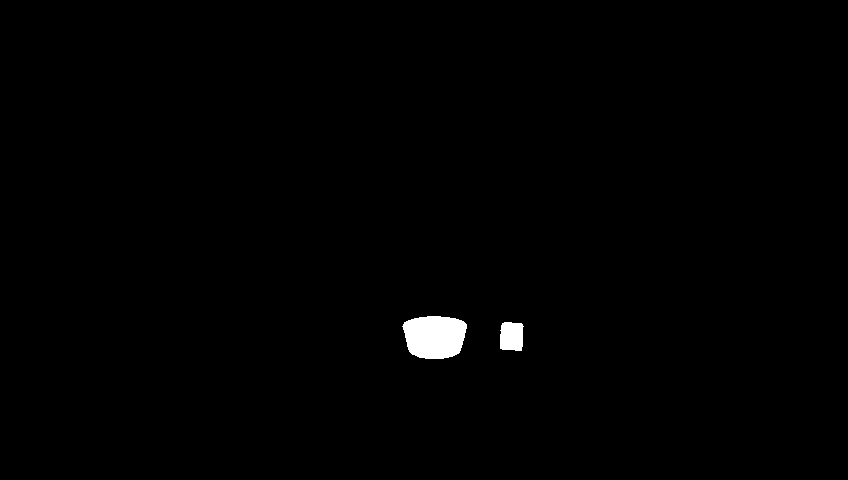

In [35]:
from pathlib import Path
save_dir = Path("./real_images")

from PIL import Image
import numpy as np

points, labels, mask = pointdrawer.run(np.asarray(Image.open(save_dir / "front_alt.png")))
Image.fromarray(mask)

In [108]:
rgb = np.asarray(Image.open(save_dir / "front_comp.png")).copy()
rgb[:300, 290:370] = 0
Image.fromarray(rgb).save(save_dir / "front_comp.png")

In [110]:
rgb1 = np.asarray(Image.open(save_dir / "front.png")).copy()
rgb2 = np.asarray(Image.open(save_dir / "front_comp.png")).copy()


rgb1_alpha = (~(rgb1 == [0, 0, 0]).all(-1)).astype(np.uint8) * 255
rgba1 = Image.fromarray(np.dstack([rgb1, rgb1_alpha]))

rgb2_alpha = (~(rgb2 == [0, 0, 0]).all(-1)).astype(np.uint8) * 255
rgba2 = Image.fromarray(np.dstack([rgb2, rgb2_alpha]))

Image.alpha_composite(rgba1, rgba2).convert("RGB").save(save_dir / "front.png")

In [93]:
rgb1_alpha

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [86]:
rgb1_alpha = (~(rgb1 == [0, 0, 0]).all(-1)).astype(np.uint8)
rgb1_alpha.shape, rgb1_alpha.dtype


((480, 848), dtype('uint8'))

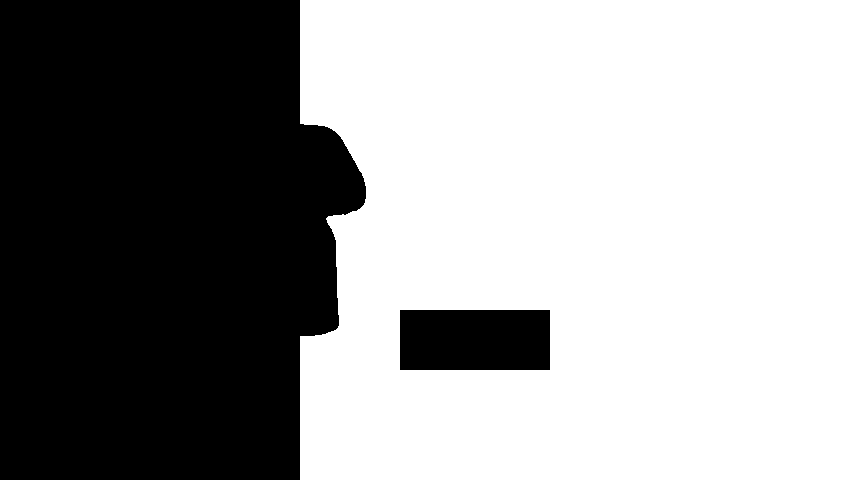

In [84]:
rgb1[~(rgb1 == [0, 0, 0]).all(-1)] = [255, 255, 255]
Image.fromarray(rgb1)

In [94]:
rgba1 = np.dstack([rgb1, rgb1_alpha])
rgba1.shape, rgba1.dtype

((480, 848, 4), dtype('uint8'))

In [96]:
rgba1 = Image.fromarray(rgba1)
rgba1.mode

'RGBA'

In [81]:
rgba1.size

(848, 480)

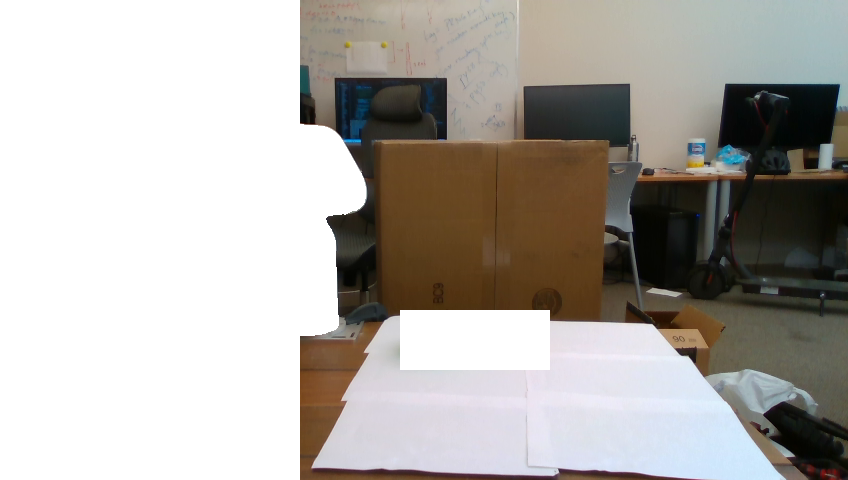

In [97]:
bg = Image.new("RGBA", rgba1.size, (255, 255, 255, 0))
Image.alpha_composite(bg, rgba1).convert("RGB")

In [ ]:
from pathlib import Path
save_dir = Path("./real_images")

from PIL import Image
import numpy as np

points, labels, mask = pointdrawer.run(np.asarray(Image.open(save_dir / "front_0.png")))
Image.fromarray(mask)